In [24]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def analyze_image_sizes(folder_path):
    image_sizes = []
    image_extensions = ['.bmp']

    for filename in os.listdir(folder_path):
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            filepath = os.path.join(folder_path, filename)
            with Image.open(filepath) as img:
                width, height = img.size
                image_sizes.append((width, height))


    if not image_sizes:
        print(f"No images found in the folder: {folder_path}")
        return

    widths, heights = zip(*image_sizes)

    heatmap, xedges, yedges = np.histogram2d(widths, heights, bins=100)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar(label='Number of images')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.title(f'Image size distribution')
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

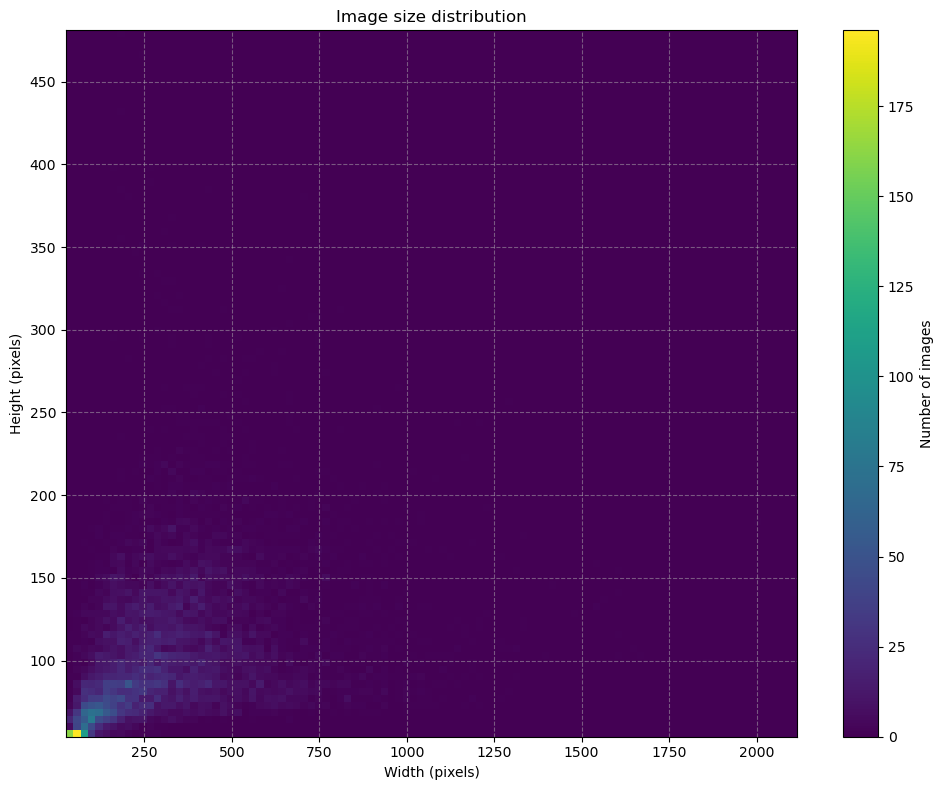

In [25]:
analyze_image_sizes('../resources/CROHME/train/img')

In [41]:
def analyze_image_aspect_ratio(folder_path):
    aspect_ratios = []
    image_extensions = ['.bmp']

    for filename in os.listdir(folder_path):
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            filepath = os.path.join(folder_path, filename)
            with Image.open(filepath) as img:
                width, height = img.size
                if height > 0:
                    aspect_ratio = width / height
                    aspect_ratios.append(aspect_ratio)


    plt.figure(figsize=(10, 6))
    plt.hist(aspect_ratios, bins=200, edgecolor='skyblue', alpha=0.7, color='skyblue')  # Adjust bins as needed
    plt.xlabel('Aspect ratio (w/h)')
    plt.ylabel('Number of images')
    plt.title(f'Aspect ratio distribution')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.axvline(1.0, color='red', linestyle='--', linewidth=1.5, label='Aspect ratio = 1')
    plt.legend()
    plt.tight_layout()
    plt.show()

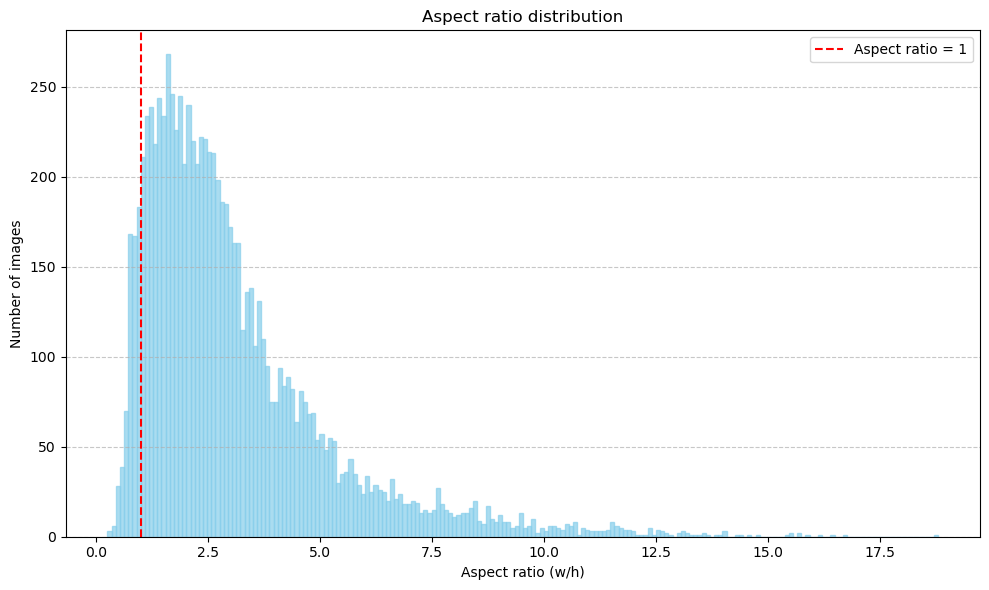

In [42]:
analyze_image_aspect_ratio('../resources/CROHME/train/img')